# ASSIGNMENT 1

In [6]:
import numpy as np
import pandas as pd
from csv import reader

# Part A: Model Code

In [7]:
wineFile = 'winequality-white.csv'
wineData = pd.read_csv(wineFile, delimiter=";")

print(list(wineData.keys()))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


5) Write a function to calculate and return the Euclidean distance of two vectors.

In [79]:
import math 
from math import sqrt
from math import pow 

def distEuclidean(v1, v2):
    dist = 0
    for i in range(len(v1)):
        dist = dist + pow((v1[i] - v2[i]), 2)
    return sqrt(dist)

In [80]:
distEuclidean([-5,-2,0],[6,0,3])

11.575836902790225

6) Write a function to calculate and return the Manhattan distance of two vectors

In [81]:
def distManhattan(v1, v2):
    dist = 0
    for i in range(len(v1)):
        dist = dist + abs(v1[i] - v2[i])
    return dist

In [82]:
distManhattan([1.0, 3.2, 4.8, 0.1, 3.2, 0.6, 2.2, 1.1],
             [0.1, 5.2, 1.9, 4.2, 1.9, 0.1, 0.1, 6.0])

18.700000000000003

In [7]:
distManhattan([2,3],[8,8])

11

7) Write a function to calculate and return the accuracy and generalization error of two vectors

In [87]:
#pVector = predict vector
#aVector = actual vector
def accuracy_score(y_true, y_pred):
    true_positive = 0
    false_positive = 0
    for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
            true_positive = true_positive + 1
        else:
            false_positive = false_positive + 1
    
    accuracy = true_positive / len(y_true)
    #TODO: Is generalization error the false positive count?
    genError = 1 - accuracy  
            
    return accuracy, genError

In [88]:
accuracy_score, genError = accuracy_score([1,1,0,1,0,0,1,0,0,0],
               [1,0,0,1,0,0,1,1,1,0])

8) Write three functions to compute: precision, recall and F1 score

In [14]:
#Binary case
def precision_score(y_true, y_pred):
    true_positive = 0
    false_positive = 0
    
    for i in range(len(y_true)):
        if (y_pred[i] == 1):
            if (y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
            else:
                false_positive = false_positive + 1
    
    precision = true_positive / (true_positive + false_positive)
    return precision

def recall_score(y_true, y_pred):
    true_positive = 0
    false_negative = 0 
    
    for i in range(len(y_pred)):
        if (y_pred[i] == 1):
            if (y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
        else:
            if (y_pred[i] != y_true[i]):
                false_negative = false_negative + 1
    
    recall = true_positive / (true_positive + false_negative)
    return recall

def f1_score(y_true, y_pred):    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = 2 * ((precision*recall)/(precision+recall))
    return f1

In [22]:
print(precision_score([1,1,0,1,0,0,1,0,0,0],
               [1,0,0,1,0,0,1,1,1,0]))
print(recall_score([1,1,0,1,0,0,1,0,0,0],
               [1,0,0,1,0,0,1,1,1,0]))
print(f1_score([1,1,0,1,0,0,1,0,0,0],
               [1,0,0,1,0,0,1,1,1,0]))

0.6
0.75
0.6666666666666665


9) Write a function to compute the confusion matrix of two vectors

In [17]:
def confusion_matrix(y_true, y_pred):
    true_positive = 0
    false_positive = 0
    true_negative = 0 
    false_negative = 0
    
    for i in range(len(y_true)):
        if(y_pred == 1): # y_pred[i]
            if(y_pred == y_true[i]):
                true_positive = true_positive + 1
            else:
                false_positive = false_positive + 1
        else:
            if(y_pred == y_true[i]):
                true_negative = true_negative + 1
            else:
                false_negative = false_negative + 1
                
    matrix = [[true_negative,false_positive],[false_negative,true_positive]]
        
    return matrix

In [13]:
confusion_matrix([1,1,0,1,0,0,1,0,0,0],
               [1,0,0,1,0,0,1,1,1,0])

[[4, 2], [1, 3]]

10) Write a function to generate the Receiver Operating Characteristic (ROC) curve

In [2]:
def rates(confusionMatrix):
    #Using sklearn: y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]
    # threshold = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.3, 0.2, 0.1, 0]
    true_positive = confusionMatrix[1][1]
    positive = confusionMatrix[1][0] + confusionMatrix[1][1]
    false_negative = confusionMatrix[1][0]
    negative = confusionMatrix[0][0] + confusionMatrix[1][1]
    false_positive = confusionMatrix[0][1]
    true_negative = confusionMatrix[0][0]
    
    # possible divide by 0 error
    if positive is not 0:
        true_pos_rate = true_positive / (true_positive + false_negative)
    else:
        true_pos_rate = 0
    
    # possible divide by 0 error
    if negative is not 0:
        false_pos_rate = false_positive / (false_positive + true_negative)
    else:
        false_pos_rate = 0
    
    return true_pos_rate, false_pos_rate
# threshold

def performance(confusionMatrix):
    true_positive = confusionMatrix[1][1]
    positive = confusionMatrix[1][0] + confusionMatrix[1][1]
    false_negative = confusionMatrix[1][0]
    negative = confusionMatrix[0][0] + confusionMatrix[1][1]
    false_positive = confusionMatrix[0][1]
    true_negative = confusionMatrix[0][0]
    
    # possible divide by 0 error
    if positive is not 0:
        true_pos_rate = true_positive / (true_positive + false_negative)
    else:
        true_pos_rate = 0
    
    # possible divide by 0 error
    if negative is not 0:
        false_pos_rate = false_positive / (false_positive + true_negative)
    else:
        false_pos_rate = 0
    
    return true_positive, false_positive, true_negative, false_negative

def roc_curve(y_true, y_score):
    if len(y_true) is not len(y_score):
        return
    
    FPRlist = []
    TPRlist = []
        
    thresholds = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
        
    for threshold in thresholds:
        threshold_TP = 0
        threshold_FP = 0
        threshold_TN = 0
        threshold_FN = 0
        
        for score in y_score:
            
            if score >= threshold:
                threshold_TP += 1
            else:
                threshold_FP += 1
            if score >= threshold:
                threshold_TN += 1
            else:
                thresold_FN += 1
                
        # check if TP > score and others
        # generate a confusion matrix for each threshold, add the FPR/TPR for each threshold to list

        performanceMatrix = [[TN,FP],[FN,FP]]
        
        TPR, FPR = rates(performanceMatrix)
        FPRlist.append(FPR)
        TPRlist.append(TPR)
                         
    return FPRlist, TPRlist

import matplotlib.pyplot as plt
    
    #threshold = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
    
def plot_roc_curve(tpr, fpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve') # (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
#y = [[1], [0], [0], [1], [1], [0], [0], [0], [1], [1], [0], [1], [1], [0], [1], [0], [0], [1], [0], [0], [1], [0], [1], [0], [1], [0], [0], [1], [0], [0], [1], [0], [1], [1], [1], [0], [1], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [0], [1], [1], [0], [0], [1], [0], [1], [1], [1], [1], [0], [1], [1], [1], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [0], [0], [0], [1], [0], [1], [0], [0], [1], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [1], [0], [1], [1], [0], [0], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [1], [1], [1], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [0], [1]]
# scores = ([0.1, 0.4, 0.35, 0.8,0.1, 0.4, 0.35, 0.8,0.6,0.5],[0.1, 0.4, 0.35, 0.8,0.1, 0.4, 0.35, 0.8,0.6,0.5])
#scores = [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
FPR, TPR = roc_curve(y, scores)
print(FPR)
print(TPR)
plot_roc_curve(TPR, FPR)

In [19]:
# conf = confusion_matrix([1,1,0,1,0,0,1,0,0,0],[1,0,0,1,0,0,1,1,1,0])
# roc_results = roc_curve(conf)
# print(roc_results)
# #plot_roc_curve(roc_results[0], roc_results[1])
print(rates([[4, 2], [1, 3]]))

(0.75, 0.2857142857142857)


11) Write a function to compute area under curve (AUC) for the ROC curve 

In [ ]:
def roc_auc(model, v1, v2):
    
    
    return auc


12) Write a function to generate the precision-recall curve

In [ ]:
def precision_recall_curve(y_true, y_scores):
    precision = precision_score(y_true, y_scores)
    recall = recall_score(y_true, y_scores)
    thresholds = 
    return 

# We can plot precision and recall as functions of the
# threshold value.

13) Write a kNN model class

a. fit() function: 
    1. No return value necessary
    2. For kNN, this function simply needs to store the relevant values as instance variables
    3. training_features is a numpy array with rows representing data samples and columns representing features
    4. training_labels is a numpy array with labels corresponding to each row of training_features
    5. k is the number of nearest neighbors
    6. distance_f is an arbitrary distance function
    7. kwargs is a dictionary of arguments to be passed to the distance function (this will not be used with our simple distance functions, but is important for more complex functions)
        i. If you are not familiar, look up using the ** operator to unpack dictionaries as arguments
b. predict() function:
    1. Returns numpy array of kNN predictions for each row in test_features.
    2. test_features is numpy array containing samples to be tested. Same format as training_features.
    3. It will use the instance variables stored by the fit function to carry out kNN
    4. 878 students (BONUS for 478): include the option to weight the solution by inverse distance (add an extra parameter to the function call for this)
c. __init__() function:
    1. Standard python initialization function so we can instantiate the class.
    2. Doesn’t need to do anything in this case, can just ‘pass’

In [25]:
#Reminder: there is no training in knn. X_test and y_test are 
#for cross validation
'''
def fit(X_train, y_train , p, k_value):
    # Note: p = 1 is Manhattan, p = 2 is Euclidean
    for i in y_train:
        distances = []
        for j in X_train:
            if (p == 1):
                dist = distManhattan(i, j, len(y_train)-1)
            elif (p == 2):
                dist = distEuclidean(y_train, X_train[x])
        distances.append((X_train[x], dist))
        knn = distances[:k_value]
    #TODO: NOT FINISHED
        #Note: find min dist
        distances.sort(key = operator.itemgetter(1))
'''

class kNNModel:
    
    '''
    Reminder: for a given data point we want to predict
        1. Calculate distances between that point and all other points
        2. Find nearest neighbours by ranking in increasing distance.
        3. Vote on the predicted class labels based on teh classses of
        the k nearest neighbours
    '''
    knn = []
    
    def fit(self,training_features,training_labels,k,distance_f,kwargs):
        return 
    
    def fit(self,training_features,training_labels,k,distance_f):
        for i in training_labels:
            distances = []
            for j in training_features:
                dist = distance_f(i,j)
            distances.append(training_features[i], dist)
            distances.sort(key = operator.itemgetter(1))
            knn = distances[:k]
        return 

    def predict(self,test_features):
        #Calculate most frequent class in neighbors 
        votes = []
        for i in range(len(knn)):
            response = knn[i][-1]
            if (response in votes):
                votes[response] += 1
            else:
                votes[response] = 1
        sortedVotes = sorted(votes.iteritems(), key=operator.itemgetter(1), reverse=True)

        return sortedVotes[0][0]

    def __init__(self):
        pass 



# Part B: Data Processing

14) Read in the ‘winequality-white.csv’ file as a pandas data frame

In [8]:
wineFile = 'winequality-white.csv'
wineData = pd.read_csv(wineFile, delimiter=";")

print(list(wineData.keys()))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


15) The target will be the ‘quality’ columnwhich represents rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine).

In [9]:
X = wineData

# Target Vector
y = (wineData["quality"] > 5).astype(np.int) # 1 if > 5 ( = "good") , else 0 (= "bad")

16) Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles(3 pts).

pandas.core.frame.DataFrame

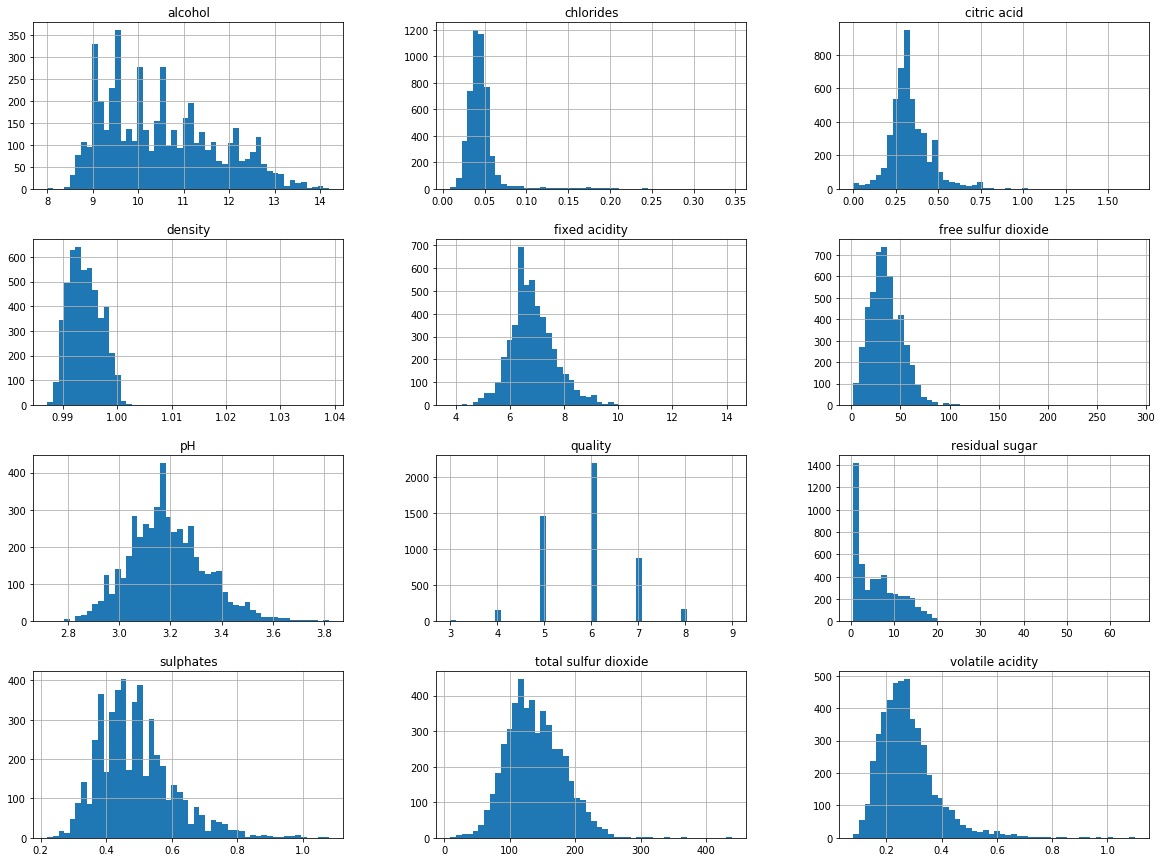

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

wineData.hist(bins=50, figsize=(20,15))
wineData.describe()

#dataframe.toexcel

17) Shuffle the rows of your data - we don’t want the order the data is imported in to affect our findings

In [19]:
wineData = wineData.sample(frac=1)

In [20]:
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2745,6.7,0.44,0.22,4.30,0.032,19.0,99.0,0.99015,3.26,0.53,12.8,7
3732,7.5,0.28,0.41,1.30,0.044,11.0,126.0,0.99293,3.28,0.45,10.3,5
1749,6.1,0.17,0.27,1.50,0.056,45.0,135.0,0.99240,3.20,0.43,10.2,6
1122,6.6,0.25,0.39,1.45,0.040,40.0,89.0,0.99110,3.35,0.40,11.4,7
1823,7.3,0.19,0.24,6.30,0.054,34.0,231.0,0.99640,3.36,0.54,10.0,6


18) Generate pair plots using the seaborn package (see first recitation notebook). You need to identify and report the redundant features.

In [ ]:
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24) 

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(wineData)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);


19) Drop the redundant features 

In [21]:
#wineData.corr()['quality'].sort_values(ascending=False)

corr_matrix = wineData.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(corr_matrix)
print(high_corr_var)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.022697     0.289181   
volatile acidity           0.022697          1.000000     0.149472   
citric acid                0.289181          0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide        0.049396          0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                         0.425858          0.031915     0.163748   
sulphates                  0.017143          0.035728     0.062331   
alcohol                    0.120881          0.067718     0.075729   
quality                    0.113663          0.194723     0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [22]:
X = X.drop(columns=["density"])

20) Write a function named "partition" to split your data into train and test set. The function should take 3 arguments: feature matrix (numpy array with rows representing data samples and columns representing features.), target vector (numpy array with labels corresponding to each row of teh feature matrix), t. Here t is a real number to determine the size of partition. For example, if t is set to 0.2, then 80% of tehh data will be used for training and 20% for testing. This function should return two feature matrices for train and test data, and two target vectors for train test data. 

In [ ]:
def partition(X, y,t):
    X = X.sample(frac=1)
    y = y.sample(frac=1)
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, X_test, y_train, y_test = partition(X, y, 0.2)

In [ ]:
print("X size: ", len(X))
print("X_train size: ", len(X_train))
print("X_test size: ", len(X_test))
print("y_train size: ", len(y_train))
print("y_test size: ", len(y_test))

21) Naively run your kNN model on the train dataset with k = 5 and using Euclidean distance. 

    a. Use accuracy and F1 score to compare your predictions to the expected labels
    
    b. Now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data.
    
    c. Return the kNN model on teh standardized data, find the accuracy and F1 score with the expected labels 
    
    d. Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assigment. 

# Part C: Model Evaluation

22. Write the S-fold (aka k-Fold) cross-validation function:

    a. sFold():
    
        i. folds in an integer number of folds. 
        
        ii. data is a numpy array with rows representing data samples and columns representing features
        
        iii. labels is a numpy array with labels corresponding to each row of training_features
        
        iv. model is an object with teh fit and predict functions
        
        v. model args is a dictionary of arugments to pass to the classification algorithm 
        
        vi. error_function:
            
            1. Returns error value between predicted and true labels. For example accuracy, generalization error, precision, recall, and F1 score could be used as error_function
     
     b. How it should work:
          
          i. Use a helper function to calculate an S-partition of the data (i.e., partition the data into S equally sized portions)
          
          ii. For each partition
              
             1. Make a model using the model class
             
             2. Fit the data to all other partitions (1 - folds) 
              
             3. Classify on current partition
              
             4. Store expected labels and predicted labels for current partition
          
          iii. the average error (for all partitions) using the error_function on stored expected and predicted labels
     
     c. It should return:
         
         i. A Python dictionary with the following elements
             
             1. Expected labels
             
             2. Predicted labels
             
             3. Average error

In [2]:
def sFold(folds, data, labels, model, model_args, error_function):
    # use helper function to calculate S-partition of data, S equally sized portions
    # for each partition, make a model using the model class
    # model.makemodel
    # fit the data to all other partitions (1-folds)
    # classify on current partition
    # store expected labels and predicted labels for current partition
    # calculate average error for all partitions using the error_function
    # return: expected labels, predicted labels, average error
    #for fold in range(folds):
    
    
    return
    
import numpy as np

def partitionHelper(folds, data):
    # partition data into S equally sized portions

    return np.array_split(data, folds)

In [3]:
print(partitionHelper(2,[1,2,3,4,5,6,7,8]))

[array([1, 2, 3, 4]), array([5, 6, 7, 8])]


23. Use your S-fold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets: 
    
    a. k = [1, 5, 9, 11]
    
    b. distance = [Euclidean, Manhattan]
    
    c. Store the returned dictionary for each. We will need these for the report
    
    d. Determine the best model based on the overall performance (lowest average error). For the error_function of the S-fold function argument use the F1 score function.

24. Evaluate your model on the test data and report the performance measures 

    a. Precision
    
    b. Recall 
    
    c. F1 score
    
    d. Confusion matrix
    
    e. Accuracy 